In [1]:
print(
'''
***************************
*    Text Mining Task     *
***************************
'''
)


***************************
*    Text Mining Task     *
***************************



In [2]:
# Install packages

!pip install pandas
!pip install scikit-learn
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install wordcloud
!pip install imbalanced-learn

In [3]:
# Suppress all warnings

import warnings
warnings.filterwarnings("ignore")

In [4]:
# Import necessary libraries

import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from io import IncrementalNewlineDecoder
from wordcloud import WordCloud
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from nltk.tokenize import RegexpTokenizer, word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.probability import FreqDist
%matplotlib inline



nltk.download(['stopwords', 'punkt','wordnet','omw-1.4','vader_lexicon'])

[nltk_data] Downloading package stopwords to /Users/arian/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/arian/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/arian/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/arian/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/arian/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [5]:
# Load the dataset

dataset=pd.read_csv('Restaurant Reviews.csv')

In [6]:
# Part One: Build a classifier which predicts whether a given review is liked or not

In [7]:
# Exploratory Data Analysis (EDA)

In [8]:
# Preview the dataset

dataset.head()

,Review,Liked
0,Wow... Loved this place.,1.0
1,Crust is not good.,0.0
2,Not tasty and the texture was just nasty.,0.0
3,Stopped by during the late May bank holiday of...,1.0
4,The selection on the menu was great and so wer...,1.0


In [9]:
# Provide a quick overview of the distribution of data

dataset.describe(include='all')

,Review,Liked
count,2220,2117.000000
unique,1610,NaN
top,The restaurant had clean and well-maintained f...,NaN
freq,31,NaN
mean,NaN,0.519131
std,NaN,0.499752
min,NaN,0.000000
25%,NaN,0.000000
50%,NaN,1.000000
75%,NaN,1.000000


In [10]:
# Distribution of labels (0 and 1) in the dataset

print("\n All Data Labels")
print(dataset.groupby("Liked").count())


 All Data Labels
       Review
Liked        
0.0      1018
1.0      1099


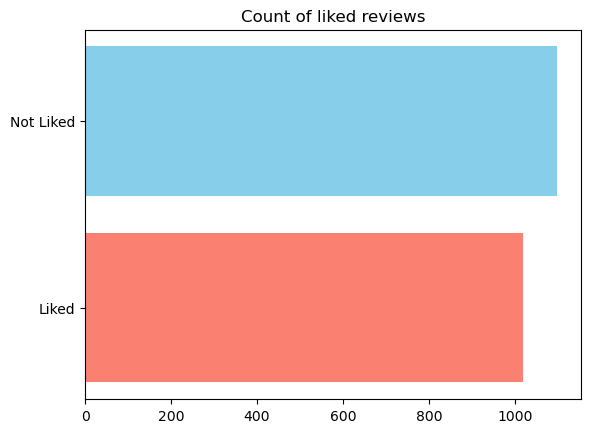

In [11]:
# Visualize the distribution of sentiment

liked_counts = dataset['Liked'].value_counts()

plt.barh(liked_counts.index, liked_counts.values, color=['skyblue', 'salmon'])
plt.title('Count of liked reviews')
plt.yticks(liked_counts.index, ['Not Liked', 'Liked'])
plt.show()

In [12]:
# Data Cleaning

In [13]:
# Check missing values

dataset.iloc[:,:].isnull().values.any()

True

In [14]:
# Count of missing values in each column

dataset.isnull().sum()

Review      0
Liked     103
dtype: int64

In [15]:
# Fill null values with the most frequent of the column

dataset = dataset.fillna(dataset.mode().iloc[0])

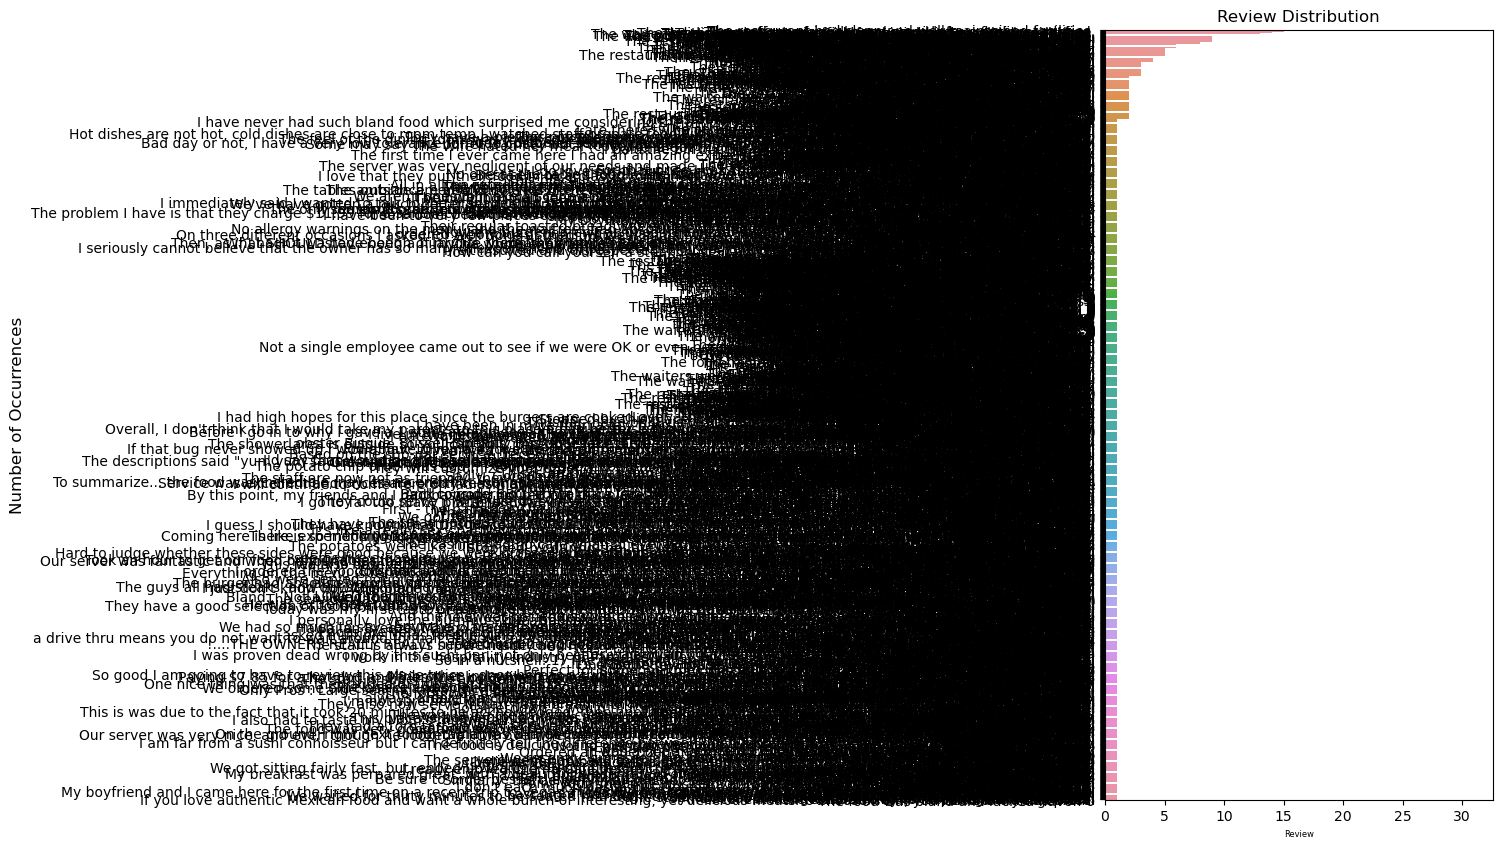

Review
The restaurant had clean and well-maintained facilities.                                                                                     31
The staff was friendly and provided exceptional service.                                                                                     23
The portions were generous and left us feeling satisfied.                                                                                    18
The dishes were made with fresh and high-quality ingredients.                                                                                15
The restaurant had efficient service and minimal wait times.                                                                                 15
                                                                                                                                             ..
If there were zero stars I would give it zero stars.                                                                             

In [16]:
# Checking the balance of the using a plot

Review_count = dataset['Review'].value_counts()
plt.figure(figsize=(5, 10))
sns.barplot(x=Review_count.values, y=Review_count.index)
plt.title('Review Distribution')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Review', fontsize=6)
plt.show()

Review_count

In [17]:
# Filter out common stop words

stop_words=nltk.corpus.stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [18]:
# Remove stopwords

dataset['Cleaned_Review'] = dataset['Review'].apply(lambda x: ' '.join([word.lower() for word in word_tokenize(x) if word.lower() not in stop_words]))
print(dataset['Cleaned_Review'])

0                                   wow ... loved place .
1                                            crust good .
2                                   tasty texture nasty .
3       stopped late may bank holiday rick steve recom...
4                           selection menu great prices .
                              ...                        
2215                  staff untrained unfamiliar menu . 0
2216                   portions skimpy left us hungry . 0
2217    restaurant unclean restrooms unpleasant odors . 0
2218                    waiters slow forgetful orders . 0
2219                  food poorly cooked tasted burnt . 0
Name: Cleaned_Review, Length: 2220, dtype: object


In [19]:
# Tokenize the Review

tokenizer=nltk.tokenize.RegexpTokenizer('[a-zA-Z0-9\']+')
dataset['Tokenized_Review'] = dataset['Cleaned_Review'].apply(lambda x: tokenizer.tokenize(str(x).lower()))

# Lemmatize and stem each word in the Review

lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

dataset['Lemmatized_Words'] = dataset['Tokenized_Review'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
dataset['Stemmed_Words'] = dataset['Tokenized_Review'].apply(lambda x: [stemmer.stem(word) for word in x])

# Display the results

print("\nTokenized Reviews:\n", dataset['Tokenized_Review'])
print("\nLemmatized Words:\n", dataset['Lemmatized_Words'])
print("\nStemmed Words:\n", dataset['Stemmed_Words'])


Tokenized Reviews:
 0                                     [wow, loved, place]
1                                           [crust, good]
2                                 [tasty, texture, nasty]
3       [stopped, late, may, bank, holiday, rick, stev...
4                        [selection, menu, great, prices]
                              ...                        
2215              [staff, untrained, unfamiliar, menu, 0]
2216              [portions, skimpy, left, us, hungry, 0]
2217    [restaurant, unclean, restrooms, unpleasant, o...
2218                [waiters, slow, forgetful, orders, 0]
2219             [food, poorly, cooked, tasted, burnt, 0]
Name: Tokenized_Review, Length: 2220, dtype: object

Lemmatized Words:
 0                                     [wow, loved, place]
1                                           [crust, good]
2                                 [tasty, texture, nasty]
3       [stopped, late, may, bank, holiday, rick, stev...
4                         [selection,

In [20]:
# Preview normalized dataset

dataset

,Review,Liked,Cleaned_Review,Tokenized_Review,Lemmatized_Words,Stemmed_Words
0,Wow... Loved this place.,1.0,wow ... loved place .,"[wow, loved, place]","[wow, loved, place]","[wow, love, place]"
1,Crust is not good.,0.0,crust good .,"[crust, good]","[crust, good]","[crust, good]"
2,Not tasty and the texture was just nasty.,0.0,tasty texture nasty .,"[tasty, texture, nasty]","[tasty, texture, nasty]","[tasti, textur, nasti]"
3,Stopped by during the late May bank holiday of...,1.0,stopped late may bank holiday rick steve recom...,"[stopped, late, may, bank, holiday, rick, stev...","[stopped, late, may, bank, holiday, rick, stev...","[stop, late, may, bank, holiday, rick, steve, ..."
4,The selection on the menu was great and so wer...,1.0,selection menu great prices .,"[selection, menu, great, prices]","[selection, menu, great, price]","[select, menu, great, price]"
...,...,...,...,...,...,...
2215,The staff was untrained and unfamiliar with th...,1.0,staff untrained unfamiliar menu . 0,"[staff, untrained, unfamiliar, menu, 0]","[staff, untrained, unfamiliar, menu, 0]","[staff, untrain, unfamiliar, menu, 0]"
2216,The portions were skimpy and left us hungry. 0,1.0,portions skimpy left us hungry . 0,"[portions, skimpy, left, us, hungry, 0]","[portion, skimpy, left, u, hungry, 0]","[portion, skimpi, left, us, hungri, 0]"
2217,The restaurant had unclean restrooms and unple...,1.0,restaurant unclean restrooms unpleasant odors . 0,"[restaurant, unclean, restrooms, unpleasant, o...","[restaurant, unclean, restroom, unpleasant, od...","[restaur, unclean, restroom, unpleas, odor, 0]"
2218,The waiters were slow and forgetful with our o...,1.0,waiters slow forgetful orders . 0,"[waiters, slow, forgetful, orders, 0]","[waiter, slow, forgetful, order, 0]","[waiter, slow, forget, order, 0]"


In [21]:
# Split the dataset into features (X) and target variable (y)

y =dataset['Liked']
X =dataset['Review']  

X_train, X_test, y_train, y_test=train_test_split( X,y,train_size=0.8, test_size=0.2, random_state=99)

In [22]:
# Implement the Vectorize Count

vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [23]:
# Create and train the Naive Bayes model

model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

Accuracy Score: 80.63%
Classification Report:

              precision    recall  f1-score   support

         0.0       0.76      0.83      0.80       203
         1.0       0.85      0.78      0.81       241

    accuracy                           0.81       444
   macro avg       0.81      0.81      0.81       444
weighted avg       0.81      0.81      0.81       444



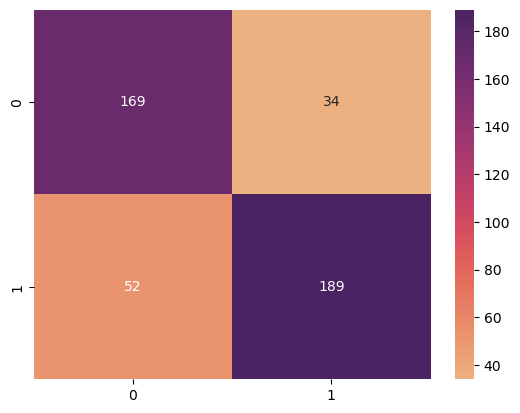

In [24]:
# Display a heatmap of a confusion matrix for classifier

y_pred=model.predict(X_test)

print(f"Accuracy Score: {accuracy_score(y_test,y_pred)*100:.2f}%")
cm = confusion_matrix(y_test,y_pred)
ax = sns.heatmap(cm, cmap='flare',annot=True, fmt='d')
result= metrics.classification_report(y_test,y_pred)
print('Classification Report:\n')
print(result)

In [25]:
# Part Two: Sentiment analysis

In [26]:
# Create a function to apply all of data preprocessing steps on a corpus

def preprocess_text(text):
    
    
    #Tokenize
    tokenized_document=nltk.tokenize.RegexpTokenizer('[a-zA-Z0-9\']+').tokenize(text)  
    
    #Remove
    cleaned_tokens=[word.lower() for word in tokenized_document if word.lower() not in stop_words] 
    
    #Stemming
    stemmed_text=[nltk.stem.PorterStemmer().stem(word) for word in cleaned_tokens] 
    return stemmed_text

In [27]:
# Proof of the reason why we need VADER (Valence Aware Dictionary for Sentiment Reasoning)

print(preprocess_text('This restaurant is great!'))
print(preprocess_text('This restaurant is not great!'))

['restaur', 'great']
['restaur', 'great']


In [28]:
# Numerical representation of the sentiment polarity

sentiment=SentimentIntensityAnalyzer()

print(sentiment.polarity_scores('This restaurant is great!'))
print(sentiment.polarity_scores('This restaurant is not great'))

{'neg': 0.0, 'neu': 0.406, 'pos': 0.594, 'compound': 0.6588}
{'neg': 0.452, 'neu': 0.548, 'pos': 0.0, 'compound': -0.5096}


In [29]:
# Apply sentiment analysis to each review

dataset['compound'] = [sentiment.polarity_scores(review)['compound'] for review in dataset['Review']]
dataset['neg'] = [sentiment.polarity_scores(review)['neg'] for review in dataset['Review']]
dataset['neu'] = [sentiment.polarity_scores(review)['neu'] for review in dataset['Review']]
dataset['pos'] = [sentiment.polarity_scores(review)['pos'] for review in dataset['Review']]

In [30]:
# Preview the sentimented dataset

dataset.head()

,Review,Liked,Cleaned_Review,Tokenized_Review,Lemmatized_Words,Stemmed_Words,compound,neg,neu,pos
0,Wow... Loved this place.,1.0,wow ... loved place .,"[wow, loved, place]","[wow, loved, place]","[wow, love, place]",0.5994,0.000,0.435,0.565
1,Crust is not good.,0.0,crust good .,"[crust, good]","[crust, good]","[crust, good]",-0.3412,0.445,0.555,0.000
2,Not tasty and the texture was just nasty.,0.0,tasty texture nasty .,"[tasty, texture, nasty]","[tasty, texture, nasty]","[tasti, textur, nasti]",-0.5574,0.340,0.660,0.000
3,Stopped by during the late May bank holiday of...,1.0,stopped late may bank holiday rick steve recom...,"[stopped, late, may, bank, holiday, rick, stev...","[stopped, late, may, bank, holiday, rick, stev...","[stop, late, may, bank, holiday, rick, steve, ...",0.6908,0.093,0.585,0.322
4,The selection on the menu was great and so wer...,1.0,selection menu great prices .,"[selection, menu, great, prices]","[selection, menu, great, price]","[select, menu, great, price]",0.6249,0.000,0.728,0.272


In [31]:
# Provide a quick overview of the sentimented columns

dataset[['compound','neg','neu','pos']].describe()

,compound,neg,neu,pos
count,2220.000000,2220.000000,2220.000000,2220.000000
mean,0.128506,0.091909,0.741035,0.167054
std,0.431372,0.161074,0.204272,0.204437
min,-0.863700,0.000000,0.000000,0.000000
25%,-0.171100,0.000000,0.617000,0.000000
50%,0.000000,0.000000,0.721500,0.000000
75%,0.510600,0.184500,1.000000,0.316000
max,0.952400,1.000000,1.000000,0.880000


<Axes: xlabel='compound', ylabel='Count'>

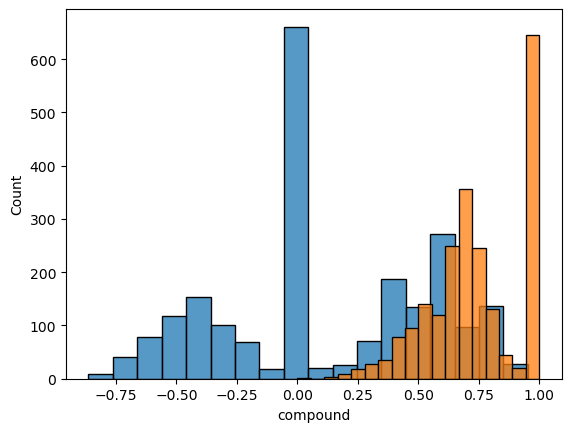

In [32]:
# Visualize the distribution of sentiment and neutral scores

sns.histplot(dataset['compound'])
sns.histplot(dataset['neu'])

<Axes: xlabel='pos', ylabel='Count'>

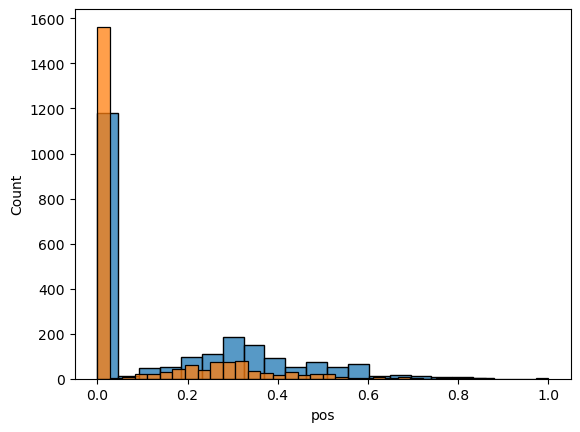

In [33]:
# Visualize the distribution of positive and negative sentiment scores

sns.histplot(dataset['pos'])
sns.histplot(dataset['neg'])

In [34]:
# The number of negative reviews

(dataset['compound']<= 0).groupby(dataset['Review']).sum()

Review
!....THE OWNERS REALLY REALLY need to quit being soooooo cheap let them wrap my freaking sandwich in two papers not one!    1
(It wasn't busy either) Also, the building was FREEZING cold.                                                               1
(The bathroom is just next door and very nice.)                                                                             1
* Both the Hot & Sour & the Egg Flower Soups were absolutely 5 Stars!                                                       1
- Really, really good rice, all the time.                                                                                   0
                                                                                                                           ..
very slow at seating even with reservation.                                                                                 1
very tough and very short on flavor!                                                                           

In [35]:
# Calculate as percentage of total reviews

percentage_neg=pd.DataFrame((dataset['compound']<=0).groupby(dataset['Review']).sum()
                            /dataset['Review'].groupby(dataset['Review']).count()*100,
                            columns=['% Negative Reviews']).sort_values(by='% Negative Reviews')
percentage_neg

,% Negative Reviews
Review,
you can watch them preparing the delicious food!),0.0
Service is quick and friendly.,0.0
The waiters were friendly and provided exceptional service.,0.0
The waiters were friendly and offered helpful suggestions.,0.0
Service was excellent and prices are pretty reasonable considering this is Vegas and located inside the Crystals shopping mall by Aria.,0.0
...,...
The food was bland and lacked flavor.,100.0
The food was bland and lacked any taste.,100.0
The food was bland and lacked any distinct flavor.,100.0


<Axes: xlabel='% Negative Reviews', ylabel='Review'>

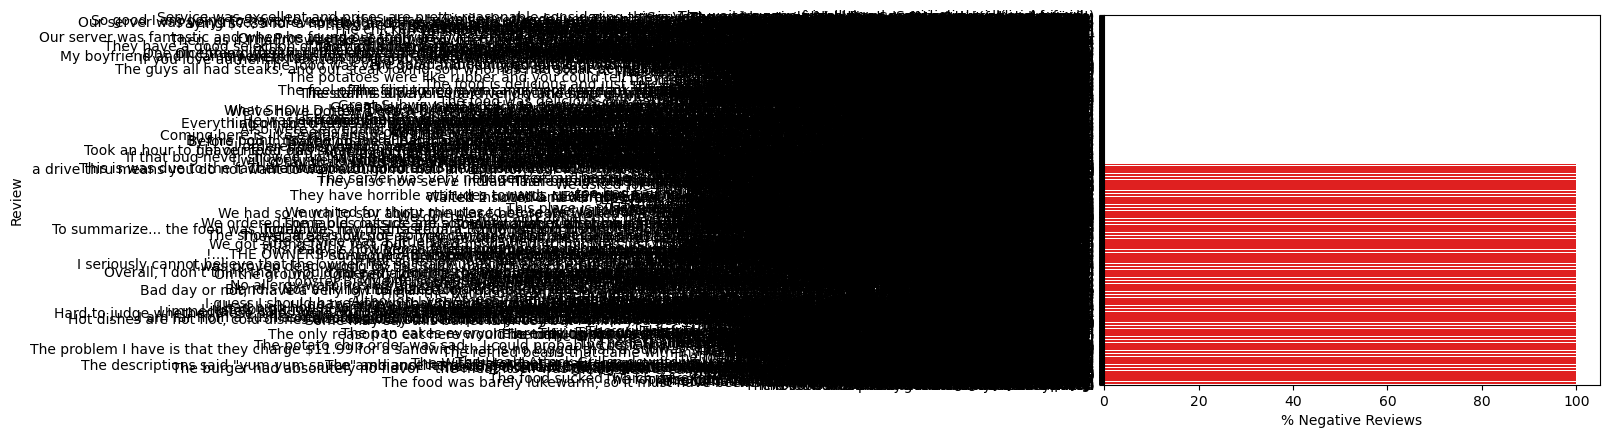

In [36]:
# Percentage of negative reviews for each corresponding review

sns.barplot(data=percentage_neg, x='% Negative Reviews', y=percentage_neg.index,  color='r')

In [37]:
# Filter reviews based on compound score

dataset['processed_review']=dataset['Review'].apply(preprocess_text)
reviews_pos = dataset.loc[dataset['compound'] > 0, :]
reviews_neg = dataset.loc[dataset['compound'] <= 0, :]

In [38]:
# Extract tokens from reviews

pos_tokens=[word for review in reviews_pos['processed_review'] for word in review]
neg_tokens=[word for review in reviews_neg['processed_review'] for word in review]

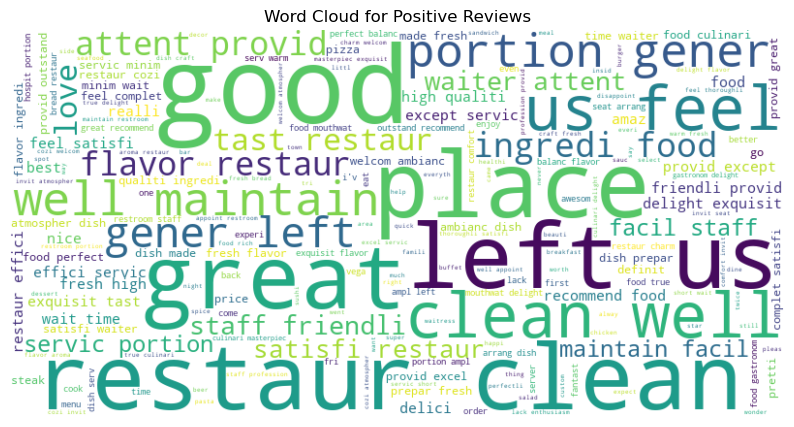

In [39]:
# Generate Word Cloud for Positive reviews

wordcloud = WordCloud(background_color='white', width=800, height=400, random_state=42, max_font_size=110).generate(' '.join(pos_tokens))

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")    
plt.axis('off')
plt.title('Word Cloud for Positive Reviews')
plt.show()

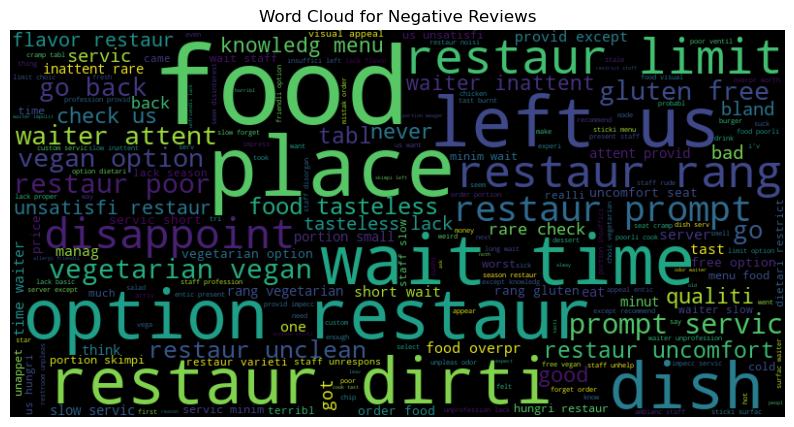

In [40]:
# Generate Word Cloud for Negative reviews

wordcloud = WordCloud(width=800, height=400, random_state=42, max_font_size=110).generate(' '.join(neg_tokens))

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")    
plt.axis('off')
plt.title('Word Cloud for Negative Reviews')
plt.show()

restaur    food  servic   great  flavor    good  provid   staff    dish    well 
    171     167     116      83      83      79      76      74      69      68 


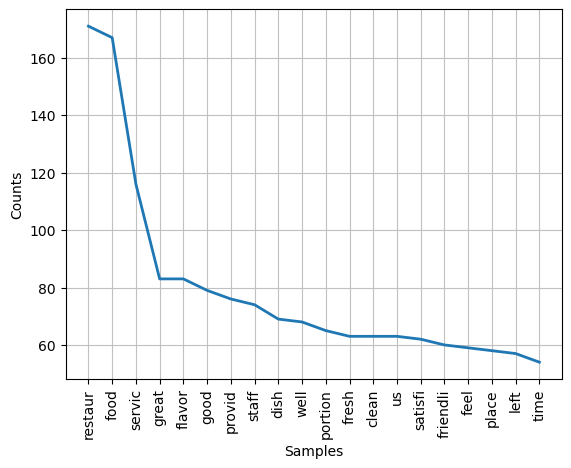

<Axes: xlabel='Samples', ylabel='Counts'>

In [41]:
# Visualize the most common words used in positive sentiments

pos_freqdist=FreqDist(pos_tokens)
pos_freqdist.tabulate(10)
pos_freqdist.plot(20)

restaur    food  servic  waiter   staff       0    wait  option      us portion 
    283     198     105     104      99      94      78      76      75      72 


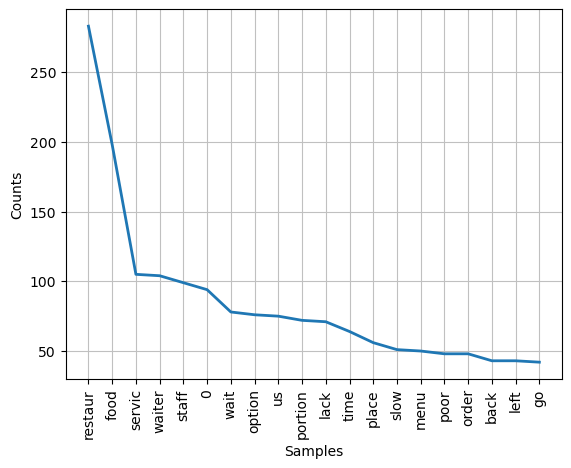

<Axes: xlabel='Samples', ylabel='Counts'>

In [42]:
# Visualize the most common words used in negative sentiments

neg_freqdist=FreqDist(neg_tokens)
neg_freqdist.tabulate(10)
neg_freqdist.plot(20)